In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

mu_0 = 4 * np.pi * 1e-7     # Permeabilidade magnética do vácuo

# **Núcleos com perna central não circular**

Leakage p.u.l. dentro da janela:                          9.355834352017444e-05 H / p.u.l.
Contribuição de Indutância de Dispersão dentro da janela: 5.2579789058338035e-06 H

Indutância de Dispersão p.u.l. fora da janela:            8.47561515309751e-05 H / p.u.l.
Contribuição de Indutância de Dispersão fora da janela:   4.407319879610706e-06 H

Indutância de Dispersão p.u.a. dos cantos                 6.877617842605544e-07 H / p.u.a.
Contribuição de Indutância de Dispersão dos cantos:       4.321334737705532e-06 H


Indutância de Dispersão total:                            1.3986633523150042e-05 H



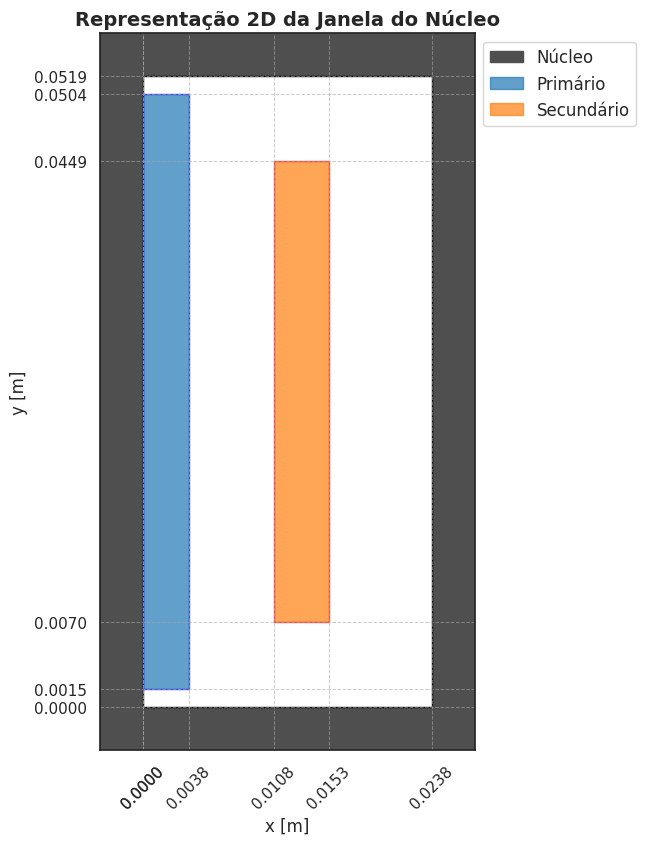

In [3]:
#####   INSIDE WINDOW   #####
# ola
### Profundidade e Largura da perna central
a_leg = 0.0281  # Profundidade  (parte que está dentro da janela)
b_leg = 0.0260  # Largura       (parte que está fora da janela)

### Largura e Altura da janela
w_w = 0.0238    # Largura   (x)
h_w = 0.0519    # Altura    (y)

### PRIMÁRIO
N_1 = 19        # Número de voltas
I_1 = 1         # Corrente
a_1 = 0.0038    # Largura
h_1 = 0.0489    # Altura

J_1 = (N_1 * I_1) / (a_1 * h_1)  # Densidade de corrente


### SECUNDÁRIO
N_2 = 18          # Número de voltas
I_2 = -N_1/N_2    # Corrente (deve ter sentido oposto ao primário)
a_2 = 0.0045      # Largura
h_2 = 0.0379      # Altura

J_2 = (N_2 * I_2) / (a_2 * h_2)  # Densidade de corrente


### Disposição dos enrolamentos na janela

h_1_minus = 0.0015 
h_1_plus = 0.0015 + h_1

h_2_minus = 0.0015 + 0.0055
h_2_plus = 0.0015 + 0.0055 + h_2

a_1_minus = 0
a_1_plus = a_1

a_2_minus = a_1 + 0.007 
a_2_plus = a_1 + 0.007 + a_2


### Desenho 2D ###
# region


##### Desenho 2D #####

# Configuração do estilo do Seaborn
sns.set_theme(style="white", palette="deep")

# Criar figura e eixos
fig, ax = plt.subplots(figsize=(6, 10))

# Desenhar o núcleo em cinza escuro (fundo)
ax.add_patch(patches.Rectangle((-a_leg/2, -a_leg/2), w_w + a_leg, h_w + a_leg,
                                edgecolor='black', facecolor='#4f4f4f', label='Núcleo'))

# Desenhar a janela do núcleo (em branco)
ax.add_patch(patches.Rectangle((0, 0), w_w, h_w, edgecolor='black', facecolor='white', label='Janela do núcleo'))

# Desenhar o enrolamento primário
ax.add_patch(patches.Rectangle((a_1_minus, h_1_minus), a_1, h_1, edgecolor='blue', facecolor='#1f77b4', alpha=0.7, label='Primário'))

# Desenhar o enrolamento secundário
ax.add_patch(patches.Rectangle((a_2_minus, h_2_minus), a_2, h_2, edgecolor='red', facecolor='#ff7f0e', alpha=0.7, label='Secundário'))

# Configurar os ticks apenas nos cantos da janela do núcleo e dos enrolamentos
x_ticks = [0, a_1_minus, a_1_plus, a_2_minus, a_2_plus, w_w]
y_ticks = [0, h_1_minus, h_1_plus, h_2_minus, h_2_plus, h_w]
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)

# Adicionar linhas pontilhadas para os ticks
for xtick in x_ticks:
    ax.axvline(x=xtick, color='darkgray', linestyle='--', linewidth=0.7, alpha=0.6)
for ytick in y_ticks:
    ax.axhline(y=ytick, color='darkgray', linestyle='--', linewidth=0.7, alpha=0.6)

# Rotacionar os números dos ticks no eixo X para evitar sobreposição
ax.tick_params(axis='x', rotation=45)

# Configurações do gráfico
ax.set_xlim(-a_leg/8, w_w + a_leg/8)
ax.set_ylim(-a_leg/8, h_w + a_leg/8)
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel("x [m]", fontsize=12)
ax.set_ylabel("y [m]", fontsize=12)

# Adicionar legenda
handles = [
    patches.Patch(color='#4f4f4f', label='Núcleo'),
    patches.Patch(color='#1f77b4', alpha=0.7, label='Primário'),
    patches.Patch(color='#ff7f0e', alpha=0.7, label='Secundário')
]
ax.legend(handles=handles, loc='best', bbox_to_anchor=(1, 1), frameon=True, fontsize=12)

# Adicionar título
ax.set_title("Representação 2D da Janela do Núcleo", fontsize=14, fontweight='bold')
ax.grid(False)  # Remover a grade

# endregion 


# Número de iterações dos somatórios
M = N = 100 

# Variáveis dos somatórios
sum_m0 = sum_0n = sum_mn = 0 


# Somatório A_m0*J_m0
for m in range(1, M):
    J_1_m0 = ((2 * J_1) / (m * h_w * np.pi)) * (np.sin((m * np.pi * a_1_plus) / w_w) - np.sin((m * np.pi * a_1_minus) / w_w)) * (h_1_plus - h_1_minus)
    A_1_m0 = (mu_0 * J_1_m0) / (((m * np.pi) / (w_w))**2)

    J_2_m0 = ((2 * J_2) / (m * h_w * np.pi)) * (np.sin((m * np.pi * a_2_plus) / w_w) - np.sin((m * np.pi * a_2_minus) / w_w)) * (h_2_plus - h_2_minus)
    A_2_m0 = (mu_0 * J_2_m0) / (((m * np.pi) / (w_w))**2)
    
    A_m0 = A_1_m0 + A_2_m0
    J_m0 = J_1_m0 + J_2_m0

    sum_m0 += A_m0 * J_m0

# Somatório A_0n*J_0n
for n in range(1, N):
    J_1_0n = ((2 * J_1) / (n * w_w * np.pi)) * (np.sin((n * np.pi * h_1_plus) / h_w) - np.sin((n * np.pi * h_1_minus) / h_w)) * (a_1_plus - a_1_minus)
    A_1_0n = (mu_0 * J_1_0n) / (((n * np.pi) / (h_w))**2)
     
    J_2_0n = ((2 * J_2) / (n * w_w * np.pi)) * (np.sin((n * np.pi * h_2_plus) / h_w) - np.sin((n * np.pi * h_2_minus) / h_w)) * (a_2_plus - a_2_minus)
    A_2_0n = (mu_0 * J_2_0n) / (((n * np.pi) / (h_w))**2)
    
    A_0n = A_1_0n + A_2_0n
    J_0n = J_1_0n + J_2_0n

    sum_0n += A_0n * J_0n

# Somatório A_mn*J_mn
for m in range(1, M):
    for n in range(1, N + 1):
        J_1_mn = ((4 * J_1) / (m * n * (np.pi)**2)) * (np.sin((m * np.pi * a_1_plus) / w_w) - np.sin((m * np.pi * a_1_minus) / w_w)) * (np.sin((n * np.pi * h_1_plus) / h_w) - np.sin((n * np.pi * h_1_minus) / h_w))
        A_1_mn = (mu_0 * J_1_mn) / (((m * np.pi) / (w_w))**2 + ((n * np.pi) / (h_w))**2)
        
        J_2_mn = ((4 * J_2) / (m * n * (np.pi)**2)) * (np.sin((m * np.pi * a_2_plus) / w_w) - np.sin((m * np.pi * a_2_minus) / w_w)) * (np.sin((n * np.pi * h_2_plus) / h_w) - np.sin((n * np.pi * h_2_minus) / h_w))
        A_2_mn = (mu_0 * J_2_mn) / (((m * np.pi) / (w_w))**2 + ((n * np.pi) / (h_w))**2)        

        A_mn = A_1_mn + A_2_mn
        J_mn = J_1_mn + J_2_mn

        sum_mn += A_mn * J_mn


# Corrente de referência 
I_ref = I_1 

### Indutância de Dispersão p.u.l. (Dentro da Janela)
Lk_pul_IW = ((w_w*h_w) / (2 * I_ref**2)) * (sum_m0 + sum_0n + 0.5*sum_mn)   # (4.16)

print('Leakage p.u.l. dentro da janela:                         ', Lk_pul_IW, 'H / p.u.l.')


### Contribuição de Indutância de Dispersão Dentro da Janela:
print('Contribuição de Indutância de Dispersão dentro da janela:', Lk_pul_IW*a_leg*2, 'H')



####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### #######
####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### #######
####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### #######



#####   OUTSIDE WINDOW   #####


### "JANELA INFINITA"
 
w_w = (0.0238+0.0519)*5  # Largura   (x)
h_w = (0.0238+0.0519)*5  # Altura    (y)


### OS ENROLAMENTOS DEVEM ESTAR NO "CENTRO" DA "JANELA INFINITA" 

h_1_minus = -h_1/2 + h_w/2
h_1_plus = h_1/2 + h_w/2

h_2_minus = -h_2/2 + h_w/2
h_2_plus = h_2/2 + h_w/2


# Número de iterações dos somatórios
M = N = 130 

# Variáveis dos somatórios
sum_m0 = sum_0n = sum_mn = 0 

# Somatório A_m0*J_m0
for m in range(1, M):
    J_1_m0 = ((2 * J_1) / (m * h_w * np.pi)) * (np.sin((m * np.pi * a_1_plus) / w_w) - np.sin((m * np.pi * a_1_minus) / w_w)) * (h_1_plus - h_1_minus)
    A_1_m0 = (mu_0 * J_1_m0) / (((m * np.pi) / (w_w))**2)

    J_2_m0 = ((2 * J_2) / (m * h_w * np.pi)) * (np.sin((m * np.pi * a_2_plus) / w_w) - np.sin((m * np.pi * a_2_minus) / w_w)) * (h_2_plus - h_2_minus)
    A_2_m0 = (mu_0 * J_2_m0) / (((m * np.pi) / (w_w))**2)
    
    A_m0 = A_1_m0 + A_2_m0
    J_m0 = J_1_m0 + J_2_m0

    sum_m0 += A_m0 * J_m0

# Somatório A_0n*J_0n
for n in range(1, N):
    J_1_0n = ((2 * J_1) / (n * w_w * np.pi)) * (np.sin((n * np.pi * h_1_plus) / h_w) - np.sin((n * np.pi * h_1_minus) / h_w)) * (a_1_plus - a_1_minus)
    A_1_0n = (mu_0 * J_1_0n) / (((n * np.pi) / (h_w))**2)
     
    J_2_0n = ((2 * J_2) / (n * w_w * np.pi)) * (np.sin((n * np.pi * h_2_plus) / h_w) - np.sin((n * np.pi * h_2_minus) / h_w)) * (a_2_plus - a_2_minus)
    A_2_0n = (mu_0 * J_2_0n) / (((n * np.pi) / (h_w))**2)
    
    A_0n = A_1_0n + A_2_0n
    J_0n = J_1_0n + J_2_0n

    sum_0n += A_0n * J_0n

# Somatório A_mn*J_mn
for m in range(1, M):
    for n in range(1, N + 1):
        J_1_mn = ((4 * J_1) / (m * n * (np.pi)**2)) * (np.sin((m * np.pi * a_1_plus) / w_w) - np.sin((m * np.pi * a_1_minus) / w_w)) * (np.sin((n * np.pi * h_1_plus) / h_w) - np.sin((n * np.pi * h_1_minus) / h_w))
        A_1_mn = (mu_0 * J_1_mn) / (((m * np.pi) / (w_w))**2 + ((n * np.pi) / (h_w))**2)
        
        J_2_mn = ((4 * J_2) / (m * n * (np.pi)**2)) * (np.sin((m * np.pi * a_2_plus) / w_w) - np.sin((m * np.pi * a_2_minus) / w_w)) * (np.sin((n * np.pi * h_2_plus) / h_w) - np.sin((n * np.pi * h_2_minus) / h_w))
        A_2_mn = (mu_0 * J_2_mn) / (((m * np.pi) / (w_w))**2 + ((n * np.pi) / (h_w))**2)        

        A_mn = A_1_mn + A_2_mn
        J_mn = J_1_mn + J_2_mn

        sum_mn += A_mn * J_mn



### Indutância de Dispersão p.u.l. (Fora da Janela)
Lk_pul_OW = ((w_w*h_w) / (2 * I_ref**2)) * (sum_m0 + sum_0n + 0.5*sum_mn)   # (4.16)

print('')
print('Indutância de Dispersão p.u.l. fora da janela:           ', Lk_pul_OW, 'H / p.u.l.')

### Contribuição de Indutância de Dispersão Fora da Janela:
print('Contribuição de Indutância de Dispersão fora da janela:  ', Lk_pul_OW*b_leg*2, 'H')



####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### #######
####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### #######
####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### #######



#####   OUTSIDE WINDOW   #####
#####       CANTOS       #####


# Número de iterações dos somatórios
M = N = 150 

# Variáveis dos somatórios
sum_m0 = sum_0n = sum_mn = 0 


J_1_dict_OW = {}
J_2_dict_OW = {}


for m in range(1, M):


    if (m, 0) not in J_1_dict_OW:
        J_1_m0 = ((2 * J_1) / (m * h_w * np.pi)) * (np.sin((m * np.pi * a_1_plus) / w_w) - np.sin((m * np.pi * a_1_minus) / w_w)) * (h_1_plus - h_1_minus)
        J_1_dict_OW[(m, 0)] = J_1_m0  
    else:
        J_1_m0 = J_1_dict_OW[(m, 0)] 


    if (m, 0) not in J_2_dict_OW:
        J_2_m0 = ((2 * J_2) / (m * h_w * np.pi)) * (np.sin((m * np.pi * a_2_plus) / w_w) - np.sin((m * np.pi * a_2_minus) / w_w)) * (h_2_plus - h_2_minus)
        J_2_dict_OW[(m, 0)] = J_2_m0  
    else:
        J_2_m0 = J_2_dict_OW[(m, 0)]  



    A_1_m0 = (mu_0 * J_1_m0) / (((m * np.pi) / (w_w))**2)
    A_2_m0 = (mu_0 * J_2_m0) / (((m * np.pi) / (w_w))**2)

    A_m0 = A_1_m0 + A_2_m0
    J_m0 = J_1_m0 + J_2_m0

   
    J_til_m0_temp = 0
    J_til_m0 = (0 + 1)*J_m0 


    for p in range(1, M):
        if (m + p) % 2 == 1: 
            if (p, 0) not in J_1_dict_OW:
                J_1_p0 = ((2 * J_1) / (p * h_w * np.pi)) * (np.sin((p * np.pi * a_1_plus) / w_w) - np.sin((p * np.pi * a_1_minus) / w_w)) * (h_1_plus - h_1_minus)
            else:
                J_1_p0 = J_1_dict_OW[(p, 0)]
        
            if (p, 0) not in J_2_dict_OW:
                J_2_p0 = ((2 * J_2) / (p * h_w * np.pi)) * (np.sin((p * np.pi * a_2_plus) / w_w) - np.sin((p * np.pi * a_2_minus) / w_w)) * (h_2_plus - h_2_minus)
            else:
                J_2_p0 = J_2_dict_OW[(p, 0)]

            J_p0 = J_1_p0 + J_2_p0

            J_til_m0_temp += (8/(np.pi**2)) * (1/(2*p**2) - (m**2 + p**2)/((m**2 - p**2)**2)) * J_p0



    sum_m0 += A_m0 * (J_til_m0 + J_til_m0_temp)


for n in range(1, N):
    
    if (0, n) not in J_1_dict_OW:
        J_1_0n = ((2 * J_1) / (n * w_w * np.pi)) * (np.sin((n * np.pi * h_1_plus) / h_w) - np.sin((n * np.pi * h_1_minus) / h_w)) * (a_1_plus - a_1_minus)
        J_1_dict_OW[(0, n)] = J_1_0n  
    else:
        J_1_0n = J_1_dict_OW[(0, n)]  
    
    if (0, n) not in J_2_dict_OW:
        J_2_0n = ((2 * J_2) / (n * w_w * np.pi)) * (np.sin((n * np.pi * h_2_plus) / h_w) - np.sin((n * np.pi * h_2_minus) / h_w)) * (a_2_plus - a_2_minus)
        J_2_dict_OW[(0, n)] = J_2_0n  
    else:
        J_2_0n = J_2_dict_OW[(0, n)]  
    

    A_1_0n = (mu_0 * J_1_0n) / (((n * np.pi) / (h_w))**2)
    A_2_0n = (mu_0 * J_2_0n) / (((n * np.pi) / (h_w))**2)
    
    A_0n = A_1_0n + A_2_0n
    J_0n = J_1_0n + J_2_0n
    

    J_til_0n_temp = 0
    J_til_0n = (0 + 1)*J_0n 
    
    
    for p in range(1, M):
        if p % 2 == 1:  
                
                if (p, n) not in J_1_dict_OW:
                    J_1_pn = ((4 * J_1) / (p * n * (np.pi)**2)) * (np.sin((p * np.pi * a_1_plus) / w_w) - np.sin((p * np.pi * a_1_minus) / w_w)) * (np.sin((n * np.pi * h_1_plus) / h_w) - np.sin((n * np.pi * h_1_minus) / h_w))
                    J_1_dict_OW[(p, n)] = J_1_pn  
                else:
                    J_1_pn = J_1_dict_OW[(p, n)]  

                
                if (p, n) not in J_2_dict_OW:
                    J_2_pn = ((4 * J_2) / (p * n * (np.pi)**2)) * (np.sin((p * np.pi * a_2_plus) / w_w) - np.sin((p * np.pi * a_2_minus) / w_w)) * (np.sin((n * np.pi * h_2_plus) / h_w) - np.sin((n * np.pi * h_2_minus) / h_w))
                    J_2_dict_OW[(p, n)] = J_2_pn  
                else:
                    J_2_pn = J_2_dict_OW[(p, n)]  

                J_pn = J_1_pn + J_2_pn

                J_til_0n_temp += (8/(np.pi**2)) * (h_w**2/(p**2 * h_w**2 + n**2 * w_w**2) - (1/p**2)*(1 + (n**2 * w_w**2) / (p**2 * h_w**2 + n**2 * w_w**2))) * J_pn* 0.5

    
    sum_0n += A_0n * (J_til_0n + J_til_0n_temp)


for m in range(1, M):
    for n in range(1, N):

        if (m, n) not in J_1_dict_OW:
            J_1_mn = ((4 * J_1) / (m * n * (np.pi)**2)) * (np.sin((m * np.pi * a_1_plus) / w_w) - np.sin((m * np.pi * a_1_minus) / w_w)) * (np.sin((n * np.pi * h_1_plus) / h_w) - np.sin((n * np.pi * h_1_minus) / h_w))
            J_1_dict_OW[(m, n)] = J_1_mn  
        else:
            J_1_mn = J_1_dict_OW[(m, n)]  

        if (m, n) not in J_2_dict_OW:
            J_2_mn = ((4 * J_2) / (m * n * (np.pi)**2)) * (np.sin((m * np.pi * a_2_plus) / w_w) - np.sin((m * np.pi * a_2_minus) / w_w)) * (np.sin((n * np.pi * h_2_plus) / h_w) - np.sin((n * np.pi * h_2_minus) / h_w))
            J_2_dict_OW[(m, n)] = J_2_mn  
        else:
            J_2_mn = J_2_dict_OW[(m, n)]  



        A_1_mn = (mu_0 * J_1_mn) / (((m * np.pi) / (w_w))**2 + ((n * np.pi) / (h_w))**2)
        A_2_mn = (mu_0 * J_2_mn) / (((m * np.pi) / (w_w))**2 + ((n * np.pi) / (h_w))**2)
        A_mn = A_1_mn + A_2_mn
        J_mn = J_1_mn + J_2_mn

        
        J_til_mn_temp = 0
        J_til_mn = (0 + 1) * J_mn


        for p in range(1, M):
            if (m + p) % 2 == 1:  
                
                if (p, n) not in J_1_dict_OW:
                    J_1_pn = ((4 * J_1) / (p * n * (np.pi)**2)) * (np.sin((p * np.pi * a_1_plus) / w_w) - np.sin((p * np.pi * a_1_minus) / w_w)) * (np.sin((n * np.pi * h_1_plus) / h_w) - np.sin((n * np.pi * h_1_minus) / h_w))
                    J_1_dict_OW[(p, n)] = J_1_pn  
                else:
                    J_1_pn = J_1_dict_OW[(p, n)]  

                
                if (p, n) not in J_2_dict_OW:
                    J_2_pn = ((4 * J_2) / (p * n * (np.pi)**2)) * (np.sin((p * np.pi * a_2_plus) / w_w) - np.sin((p * np.pi * a_2_minus) / w_w)) * (np.sin((n * np.pi * h_2_plus) / h_w) - np.sin((n * np.pi * h_2_minus) / h_w))
                    J_2_dict_OW[(p, n)] = J_2_pn  
                else:
                    J_2_pn = J_2_dict_OW[(p, n)]

                J_pn = J_1_pn + J_2_pn
                J_til_mn_temp += (8 / (np.pi**2)) * (0.5 * (h_w**2 / (p**2 * h_w**2 + n**2 * w_w**2)) - (m**2 + p**2) / ((m**2 - p**2)**2)) * J_pn

        sum_mn += A_mn * (J_til_mn + J_til_mn_temp)


### Indutância de Dispersão p.u.a. (Fora da Janela)
Lk_pua = ((h_w*(w_w**2)) / (4 * I_ref**2)) * (sum_m0 + sum_0n + 0.5*sum_mn)     # (4.38)

print('')
print('Indutância de Dispersão p.u.a. dos cantos                ', Lk_pua, 'H / p.u.a.')

### Contribuição de Indutância de Dispersão dos cantos:
print('Contribuição de Indutância de Dispersão dos cantos:      ', Lk_pua*2*np.pi, 'H')

print('')
print('')
print('Indutância de Dispersão total:                           ', Lk_pua*2*np.pi + Lk_pul_OW*b_leg*2 + Lk_pul_IW*a_leg*2, 'H')


# Mostrar o desenho 2D
print('')
plt.tight_layout()
plt.show()

Indutância de Dispersão p.u.a. dos cantos                 6.877617842605544e-07 H / p.u.a.
Contribuição de Indutância de Dispersão dos cantos:       4.321334737705532e-06 H


Indutância de Dispersão total:                            1.3986633523150042e-05 H

Indutância de Dispersão p.u.a. dos cantos                 6.877617842605544e-07 H / p.u.a.
Contribuição de Indutância de Dispersão dos cantos:       4.321334737705532e-06 H


Indutância de Dispersão total:                            1.3986633523150042e-05 H

# **Núcleos com perna central circular**

Indutância de Dispersão p.u.a. dentro da janela:          1.6123099892722516e-06 H / p.u.a.
Contribuição de Indutância de Dispersão dentro da janela: 1.3691333351402643e-06 H

Indutância de Dispersão p.u.a. fora da janela:            1.5757380440396165e-06 H / p.u.a.
Contribuição de Indutância de Dispersão fora da janela:   8.562576772726277e-06 H


Indutância de Dispersão total:                            9.931710107866541e-06 H



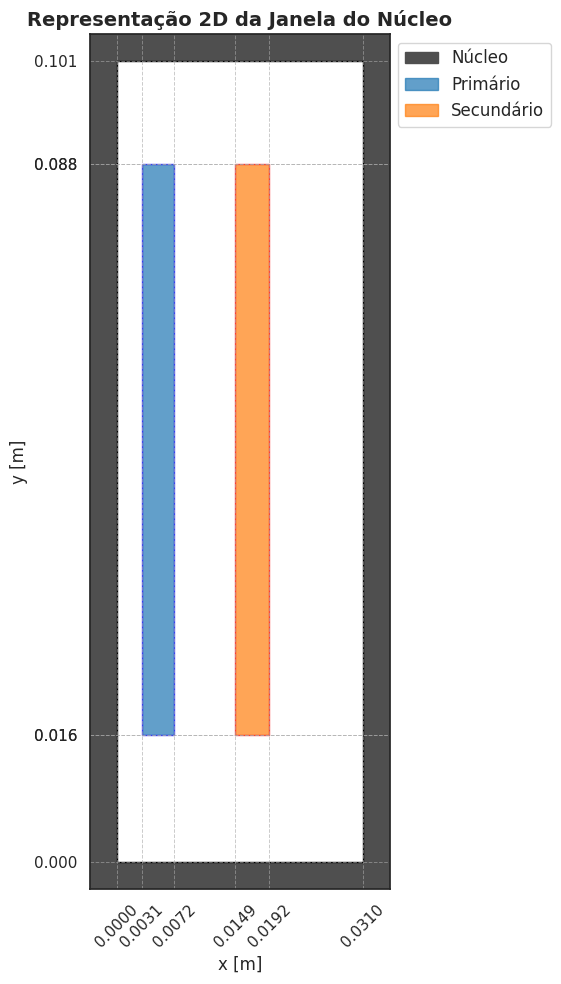

In [5]:
#####   INSIDE WINDOW   #####

# Diâmetro da perna central
d_leg = 0.0269

### Largura e Altura da janela
w_w = 0.0310    # Largura   (x)
h_w = 0.1010    # Altura    (y)


### PRIMÁRIO
N_1 = 20        # Número de voltas
I_1 = 1         # Corrente
a_1 = 0.0041    # Largura
h_1 = 0.0720    # Altura

J_1 = (N_1 * I_1) / (a_1 * h_1)  # Densidade de corrente


### SECUNDÁRIO
N_2 = 1350        # Número de voltas
I_2 = -N_1/N_2    # Corrente (deve ter sentido oposto ao primário)
a_2 = 0.0043      # Largura
h_2 = 0.0720      # Altura

J_2 = (N_2 * I_2) / (a_2 * h_2)  # Densidade de corrente


### Disposição dos enrolamentos na janela

h_1_minus = 0.016
h_1_plus = 0.016 + h_1

h_2_minus = 0.016
h_2_plus = 0.016 + h_2

a_1_minus = 0.0031
a_1_plus = 0.0031 + a_1

a_2_minus = 0.0031 + a_1 + 0.0077
a_2_plus = 0.0031 + a_1 + 0.0077 + a_2


### Desenho 2D ###
# region

# Configuração do estilo do Seaborn
sns.set_theme(style="white", palette="deep")

# Criar figura e eixos
fig, ax = plt.subplots(figsize=(6, 10))

# Desenhar o núcleo em cinza escuro (fundo)
ax.add_patch(patches.Rectangle((-d_leg / 2, -d_leg / 2), w_w + d_leg, h_w + d_leg,
                                edgecolor='black', facecolor='#4f4f4f', label='Núcleo'))

# Desenhar a janela do núcleo (em branco)
ax.add_patch(patches.Rectangle((0, 0), w_w, h_w, edgecolor='black', facecolor='white', label='Janela do núcleo'))

# Desenhar o enrolamento primário
ax.add_patch(patches.Rectangle((a_1_minus, h_1_minus), a_1, h_1, edgecolor='blue', facecolor='#1f77b4', alpha=0.7, label='Primário'))

# Desenhar o enrolamento secundário
ax.add_patch(patches.Rectangle((a_2_minus, h_2_minus), a_2, h_2, edgecolor='red', facecolor='#ff7f0e', alpha=0.7, label='Secundário'))

# Configurar os ticks apenas nos cantos da janela do núcleo e dos enrolamentos
x_ticks = [0, a_1_minus, a_1_plus, a_2_minus, a_2_plus, w_w]
y_ticks = [0, h_1_minus, h_1_plus, h_2_minus, h_2_plus, h_w]
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)

# Adicionar linhas pontilhadas para os ticks
for xtick in x_ticks:
    ax.axvline(x=xtick, color='darkgray', linestyle='--', linewidth=0.7, alpha=0.6)
for ytick in y_ticks:
    ax.axhline(y=ytick, color='darkgray', linestyle='--', linewidth=0.7, alpha=0.6)

# Rotacionar os números dos ticks no eixo X para evitar sobreposição
ax.tick_params(axis='x', rotation=45)

# Configurações do gráfico
ax.set_xlim(-d_leg / 8, w_w + d_leg / 8)
ax.set_ylim(-d_leg / 8, h_w + d_leg / 8)
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel("x [m]", fontsize=12)
ax.set_ylabel("y [m]", fontsize=12)

# Adicionar legenda
handles = [
    patches.Patch(color='#4f4f4f', label='Núcleo'),
    patches.Patch(color='#1f77b4', alpha=0.7, label='Primário'),
    patches.Patch(color='#ff7f0e', alpha=0.7, label='Secundário')
]
ax.legend(handles=handles, loc='best', bbox_to_anchor=(1, 1), frameon=True, fontsize=12)

# Adicionar título
ax.set_title("Representação 2D da Janela do Núcleo", fontsize=14, fontweight='bold')
ax.grid(False)  # Remover a grade


# endregion



# Número de iterações dos somatórios
M = N = 150 

# Variáveis dos somatórios
sum_m0 = sum_0n = sum_mn = 0 


J_1_dict_IW = {}
J_2_dict_IW = {}


for m in range(1, M):


    if (m, 0) not in J_1_dict_IW:
        J_1_m0 = ((2 * J_1) / (m * h_w * np.pi)) * (np.sin((m * np.pi * a_1_plus) / w_w) - np.sin((m * np.pi * a_1_minus) / w_w)) * (h_1_plus - h_1_minus)
        J_1_dict_IW[(m, 0)] = J_1_m0  
    else:
        J_1_m0 = J_1_dict_IW[(m, 0)] 


    if (m, 0) not in J_2_dict_IW:
        J_2_m0 = ((2 * J_2) / (m * h_w * np.pi)) * (np.sin((m * np.pi * a_2_plus) / w_w) - np.sin((m * np.pi * a_2_minus) / w_w)) * (h_2_plus - h_2_minus)
        J_2_dict_IW[(m, 0)] = J_2_m0  
    else:
        J_2_m0 = J_2_dict_IW[(m, 0)]  



    A_1_m0 = (mu_0 * J_1_m0) / (((m * np.pi) / (w_w))**2)
    A_2_m0 = (mu_0 * J_2_m0) / (((m * np.pi) / (w_w))**2)

    A_m0 = A_1_m0 + A_2_m0
    J_m0 = J_1_m0 + J_2_m0

   
    J_til_m0_temp = 0
    J_til_m0 = (d_leg/w_w + 1)*J_m0 


    for p in range(1, M):
        if (m + p) % 2 == 1: 
            if (p, 0) not in J_1_dict_IW:
                J_1_p0 = ((2 * J_1) / (p * h_w * np.pi)) * (np.sin((p * np.pi * a_1_plus) / w_w) - np.sin((p * np.pi * a_1_minus) / w_w)) * (h_1_plus - h_1_minus)
            else:
                J_1_p0 = J_1_dict_IW[(p, 0)]
        
            if (p, 0) not in J_2_dict_IW:
                J_2_p0 = ((2 * J_2) / (p * h_w * np.pi)) * (np.sin((p * np.pi * a_2_plus) / w_w) - np.sin((p * np.pi * a_2_minus) / w_w)) * (h_2_plus - h_2_minus)
            else:
                J_2_p0 = J_2_dict_IW[(p, 0)]

            J_p0 = J_1_p0 + J_2_p0

            J_til_m0_temp += (8/(np.pi**2)) * (1/(2*p**2) - (m**2 + p**2)/((m**2 - p**2)**2)) * J_p0



    sum_m0 += A_m0 * (J_til_m0 + J_til_m0_temp)


for n in range(1, N):
    
    if (0, n) not in J_1_dict_IW:
        J_1_0n = ((2 * J_1) / (n * w_w * np.pi)) * (np.sin((n * np.pi * h_1_plus) / h_w) - np.sin((n * np.pi * h_1_minus) / h_w)) * (a_1_plus - a_1_minus)
        J_1_dict_IW[(0, n)] = J_1_0n  
    else:
        J_1_0n = J_1_dict_IW[(0, n)]  
    
    if (0, n) not in J_2_dict_IW:
        J_2_0n = ((2 * J_2) / (n * w_w * np.pi)) * (np.sin((n * np.pi * h_2_plus) / h_w) - np.sin((n * np.pi * h_2_minus) / h_w)) * (a_2_plus - a_2_minus)
        J_2_dict_IW[(0, n)] = J_2_0n  
    else:
        J_2_0n = J_2_dict_IW[(0, n)]  
    

    A_1_0n = (mu_0 * J_1_0n) / (((n * np.pi) / (h_w))**2)
    A_2_0n = (mu_0 * J_2_0n) / (((n * np.pi) / (h_w))**2)
    
    A_0n = A_1_0n + A_2_0n
    J_0n = J_1_0n + J_2_0n
    

    J_til_0n_temp = 0
    J_til_0n = (d_leg/w_w + 1)*J_0n 
    
    
    for p in range(1, M):
        if p % 2 == 1:  
                
                if (p, n) not in J_1_dict_IW:
                    J_1_pn = ((4 * J_1) / (p * n * (np.pi)**2)) * (np.sin((p * np.pi * a_1_plus) / w_w) - np.sin((p * np.pi * a_1_minus) / w_w)) * (np.sin((n * np.pi * h_1_plus) / h_w) - np.sin((n * np.pi * h_1_minus) / h_w))
                    J_1_dict_IW[(p, n)] = J_1_pn  
                else:
                    J_1_pn = J_1_dict_IW[(p, n)]  

                
                if (p, n) not in J_2_dict_IW:
                    J_2_pn = ((4 * J_2) / (p * n * (np.pi)**2)) * (np.sin((p * np.pi * a_2_plus) / w_w) - np.sin((p * np.pi * a_2_minus) / w_w)) * (np.sin((n * np.pi * h_2_plus) / h_w) - np.sin((n * np.pi * h_2_minus) / h_w))
                    J_2_dict_IW[(p, n)] = J_2_pn  
                else:
                    J_2_pn = J_2_dict_IW[(p, n)]  

                J_pn = J_1_pn + J_2_pn

                J_til_0n_temp += (8/(np.pi**2)) * (h_w**2/(p**2 * h_w**2 + n**2 * w_w**2) - (1/p**2)*(1 + (n**2 * w_w**2) / (p**2 * h_w**2 + n**2 * w_w**2))) * J_pn* 0.5

    
    sum_0n += A_0n * (J_til_0n + J_til_0n_temp)


for m in range(1, M):
    for n in range(1, N):

        if (m, n) not in J_1_dict_IW:
            J_1_mn = ((4 * J_1) / (m * n * (np.pi)**2)) * (np.sin((m * np.pi * a_1_plus) / w_w) - np.sin((m * np.pi * a_1_minus) / w_w)) * (np.sin((n * np.pi * h_1_plus) / h_w) - np.sin((n * np.pi * h_1_minus) / h_w))
            J_1_dict_IW[(m, n)] = J_1_mn  
        else:
            J_1_mn = J_1_dict_IW[(m, n)]  

        if (m, n) not in J_2_dict_IW:
            J_2_mn = ((4 * J_2) / (m * n * (np.pi)**2)) * (np.sin((m * np.pi * a_2_plus) / w_w) - np.sin((m * np.pi * a_2_minus) / w_w)) * (np.sin((n * np.pi * h_2_plus) / h_w) - np.sin((n * np.pi * h_2_minus) / h_w))
            J_2_dict_IW[(m, n)] = J_2_mn  
        else:
            J_2_mn = J_2_dict_IW[(m, n)]  



        A_1_mn = (mu_0 * J_1_mn) / (((m * np.pi) / (w_w))**2 + ((n * np.pi) / (h_w))**2)
        A_2_mn = (mu_0 * J_2_mn) / (((m * np.pi) / (w_w))**2 + ((n * np.pi) / (h_w))**2)
        A_mn = A_1_mn + A_2_mn
        J_mn = J_1_mn + J_2_mn

        
        J_til_mn_temp = 0
        J_til_mn = (d_leg / w_w + 1) * J_mn


        for p in range(1, M):
            if (m + p) % 2 == 1:  
                
                if (p, n) not in J_1_dict_IW:
                    J_1_pn = ((4 * J_1) / (p * n * (np.pi)**2)) * (np.sin((p * np.pi * a_1_plus) / w_w) - np.sin((p * np.pi * a_1_minus) / w_w)) * (np.sin((n * np.pi * h_1_plus) / h_w) - np.sin((n * np.pi * h_1_minus) / h_w))
                    J_1_dict_IW[(p, n)] = J_1_pn  
                else:
                    J_1_pn = J_1_dict_IW[(p, n)]  

                
                if (p, n) not in J_2_dict_IW:
                    J_2_pn = ((4 * J_2) / (p * n * (np.pi)**2)) * (np.sin((p * np.pi * a_2_plus) / w_w) - np.sin((p * np.pi * a_2_minus) / w_w)) * (np.sin((n * np.pi * h_2_plus) / h_w) - np.sin((n * np.pi * h_2_minus) / h_w))
                    J_2_dict_IW[(p, n)] = J_2_pn  
                else:
                    J_2_pn = J_2_dict_IW[(p, n)]

                J_pn = J_1_pn + J_2_pn
                J_til_mn_temp += (8 / (np.pi**2)) * (0.5 * (h_w**2 / (p**2 * h_w**2 + n**2 * w_w**2)) - (m**2 + p**2) / ((m**2 - p**2)**2)) * J_pn

        sum_mn += A_mn * (J_til_mn + J_til_mn_temp)





# Corrente de referência 
I_ref = I_1 

### Indutância de Dispersão p.u.a. (Dentro da Janela)
Lk_pua_IW = ((h_w*(w_w**2)) / (4 * I_ref**2)) * (sum_m0 + sum_0n + 0.5*sum_mn)  # (4.38)

#  Seção angular que está dentro da janela (radianos)
alpha = 1.69835/2

### Indutância de Dispersão p.u.a. (Dentro da Janela)
print('Indutância de Dispersão p.u.a. dentro da janela:         ', Lk_pua_IW, 'H / p.u.a.')


### Contribuição de Indutância de Dispersão Dentro da Janela:
print('Contribuição de Indutância de Dispersão dentro da janela:', Lk_pua_IW*alpha, 'H')
print('')


####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### #######
####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### #######
####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### ####### #######



##### OUTSIDE WINDOW #####

### "JANELA INFINITA"

w_w = (0.031+0.101)*5   # Largura   (x)
h_w = (0.031+0.101)*5   # Altura    (y)


### OS ENROLAMENTOS DEVEM ESTAR NO "CENTRO" DA "JANELA INFINITA" 

h_1_minus = h_w/2 - h_1/2
h_1_plus = h_w/2 + h_1/2

h_2_minus = h_w/2 - h_2/2
h_2_plus = h_w/2 + h_2/2

# Número de iterações dos somatórios
M = N = 150

sum_m0 = sum_0n = sum_mn = 0

J_1_dict_OW = {}
J_2_dict_OW = {}


for m in range(1, M):


    if (m, 0) not in J_1_dict_OW:
        J_1_m0 = ((2 * J_1) / (m * h_w * np.pi)) * (np.sin((m * np.pi * a_1_plus) / w_w) - np.sin((m * np.pi * a_1_minus) / w_w)) * (h_1_plus - h_1_minus)
        J_1_dict_OW[(m, 0)] = J_1_m0  
    else:
        J_1_m0 = J_1_dict_OW[(m, 0)] 


    if (m, 0) not in J_2_dict_OW:
        J_2_m0 = ((2 * J_2) / (m * h_w * np.pi)) * (np.sin((m * np.pi * a_2_plus) / w_w) - np.sin((m * np.pi * a_2_minus) / w_w)) * (h_2_plus - h_2_minus)
        J_2_dict_OW[(m, 0)] = J_2_m0  
    else:
        J_2_m0 = J_2_dict_OW[(m, 0)]  



    A_1_m0 = (mu_0 * J_1_m0) / (((m * np.pi) / (w_w))**2)
    A_2_m0 = (mu_0 * J_2_m0) / (((m * np.pi) / (w_w))**2)

    A_m0 = A_1_m0 + A_2_m0
    J_m0 = J_1_m0 + J_2_m0

   
    J_til_m0_temp = 0
    J_til_m0 = (d_leg/w_w + 1)*J_m0 


    for p in range(1, M):
        if (m + p) % 2 == 1: 
            if (p, 0) not in J_1_dict_OW:
                J_1_p0 = ((2 * J_1) / (p * h_w * np.pi)) * (np.sin((p * np.pi * a_1_plus) / w_w) - np.sin((p * np.pi * a_1_minus) / w_w)) * (h_1_plus - h_1_minus)
            else:
                J_1_p0 = J_1_dict_OW[(p, 0)]
        
            if (p, 0) not in J_2_dict_OW:
                J_2_p0 = ((2 * J_2) / (p * h_w * np.pi)) * (np.sin((p * np.pi * a_2_plus) / w_w) - np.sin((p * np.pi * a_2_minus) / w_w)) * (h_2_plus - h_2_minus)
            else:
                J_2_p0 = J_2_dict_OW[(p, 0)]

            J_p0 = J_1_p0 + J_2_p0

            J_til_m0_temp += (8/(np.pi**2)) * (1/(2*p**2) - (m**2 + p**2)/((m**2 - p**2)**2)) * J_p0



    sum_m0 += A_m0 * (J_til_m0 + J_til_m0_temp)


for n in range(1, N):
    
    if (0, n) not in J_1_dict_OW:
        J_1_0n = ((2 * J_1) / (n * w_w * np.pi)) * (np.sin((n * np.pi * h_1_plus) / h_w) - np.sin((n * np.pi * h_1_minus) / h_w)) * (a_1_plus - a_1_minus)
        J_1_dict_OW[(0, n)] = J_1_0n  
    else:
        J_1_0n = J_1_dict_OW[(0, n)]  
    
    if (0, n) not in J_2_dict_OW:
        J_2_0n = ((2 * J_2) / (n * w_w * np.pi)) * (np.sin((n * np.pi * h_2_plus) / h_w) - np.sin((n * np.pi * h_2_minus) / h_w)) * (a_2_plus - a_2_minus)
        J_2_dict_OW[(0, n)] = J_2_0n  
    else:
        J_2_0n = J_2_dict_OW[(0, n)]  
    

    A_1_0n = (mu_0 * J_1_0n) / (((n * np.pi) / (h_w))**2)
    A_2_0n = (mu_0 * J_2_0n) / (((n * np.pi) / (h_w))**2)
    
    A_0n = A_1_0n + A_2_0n
    J_0n = J_1_0n + J_2_0n
    

    J_til_0n_temp = 0
    J_til_0n = (d_leg/w_w + 1)*J_0n 
    
    
    for p in range(1, M):
        if p % 2 == 1:  
                
                if (p, n) not in J_1_dict_OW:
                    J_1_pn = ((4 * J_1) / (p * n * (np.pi)**2)) * (np.sin((p * np.pi * a_1_plus) / w_w) - np.sin((p * np.pi * a_1_minus) / w_w)) * (np.sin((n * np.pi * h_1_plus) / h_w) - np.sin((n * np.pi * h_1_minus) / h_w))
                    J_1_dict_OW[(p, n)] = J_1_pn  
                else:
                    J_1_pn = J_1_dict_OW[(p, n)]  

                
                if (p, n) not in J_2_dict_OW:
                    J_2_pn = ((4 * J_2) / (p * n * (np.pi)**2)) * (np.sin((p * np.pi * a_2_plus) / w_w) - np.sin((p * np.pi * a_2_minus) / w_w)) * (np.sin((n * np.pi * h_2_plus) / h_w) - np.sin((n * np.pi * h_2_minus) / h_w))
                    J_2_dict_OW[(p, n)] = J_2_pn  
                else:
                    J_2_pn = J_2_dict_OW[(p, n)]  

                J_pn = J_1_pn + J_2_pn

                J_til_0n_temp += (8/(np.pi**2)) * (h_w**2/(p**2 * h_w**2 + n**2 * w_w**2) - (1/p**2)*(1 + (n**2 * w_w**2) / (p**2 * h_w**2 + n**2 * w_w**2))) * J_pn* 0.5

    
    sum_0n += A_0n * (J_til_0n + J_til_0n_temp)


for m in range(1, M):
    for n in range(1, N):

        if (m, n) not in J_1_dict_OW:
            J_1_mn = ((4 * J_1) / (m * n * (np.pi)**2)) * (np.sin((m * np.pi * a_1_plus) / w_w) - np.sin((m * np.pi * a_1_minus) / w_w)) * (np.sin((n * np.pi * h_1_plus) / h_w) - np.sin((n * np.pi * h_1_minus) / h_w))
            J_1_dict_OW[(m, n)] = J_1_mn  
        else:
            J_1_mn = J_1_dict_OW[(m, n)]  

        if (m, n) not in J_2_dict_OW:
            J_2_mn = ((4 * J_2) / (m * n * (np.pi)**2)) * (np.sin((m * np.pi * a_2_plus) / w_w) - np.sin((m * np.pi * a_2_minus) / w_w)) * (np.sin((n * np.pi * h_2_plus) / h_w) - np.sin((n * np.pi * h_2_minus) / h_w))
            J_2_dict_OW[(m, n)] = J_2_mn  
        else:
            J_2_mn = J_2_dict_OW[(m, n)]  



        A_1_mn = (mu_0 * J_1_mn) / (((m * np.pi) / (w_w))**2 + ((n * np.pi) / (h_w))**2)
        A_2_mn = (mu_0 * J_2_mn) / (((m * np.pi) / (w_w))**2 + ((n * np.pi) / (h_w))**2)
        A_mn = A_1_mn + A_2_mn
        J_mn = J_1_mn + J_2_mn

        
        J_til_mn_temp = 0
        J_til_mn = (d_leg / w_w + 1) * J_mn


        for p in range(1, M):
            if (m + p) % 2 == 1:  
                
                if (p, n) not in J_1_dict_OW:
                    J_1_pn = ((4 * J_1) / (p * n * (np.pi)**2)) * (np.sin((p * np.pi * a_1_plus) / w_w) - np.sin((p * np.pi * a_1_minus) / w_w)) * (np.sin((n * np.pi * h_1_plus) / h_w) - np.sin((n * np.pi * h_1_minus) / h_w))
                    J_1_dict_OW[(p, n)] = J_1_pn  
                else:
                    J_1_pn = J_1_dict_OW[(p, n)]  

                
                if (p, n) not in J_2_dict_OW:
                    J_2_pn = ((4 * J_2) / (p * n * (np.pi)**2)) * (np.sin((p * np.pi * a_2_plus) / w_w) - np.sin((p * np.pi * a_2_minus) / w_w)) * (np.sin((n * np.pi * h_2_plus) / h_w) - np.sin((n * np.pi * h_2_minus) / h_w))
                    J_2_dict_OW[(p, n)] = J_2_pn  
                else:
                    J_2_pn = J_2_dict_OW[(p, n)]

                J_pn = J_1_pn + J_2_pn
                J_til_mn_temp += (8 / (np.pi**2)) * (0.5 * (h_w**2 / (p**2 * h_w**2 + n**2 * w_w**2)) - (m**2 + p**2) / ((m**2 - p**2)**2)) * J_pn

        sum_mn += A_mn * (J_til_mn + J_til_mn_temp)



### Indutância de Dispersão p.u.a. (Fora da Janela)
Lk_pua_OW = ((h_w*(w_w**2)) / (4 * I_ref**2)) * (sum_m0 + sum_0n + 0.5*sum_mn)  # (4.38)


### Indutância de Dispersão p.u.a. (Fora da Janela)
print('Indutância de Dispersão p.u.a. fora da janela:           ', Lk_pua_OW, 'H / p.u.a.')


### Contribuição de Indutância de Dispersão Dentro da Janela:
print('Contribuição de Indutância de Dispersão fora da janela:  ', Lk_pua_OW*(2*np.pi-alpha), 'H')


print('')
print('')
print('Indutância de Dispersão total:                           ', Lk_pua_OW*(2*np.pi-alpha) + Lk_pua_IW*alpha, 'H')


print('')
# Mostrar o desenho 2D
plt.tight_layout()
plt.show()

9.931710107866541e-06 H
9.931710107866541e-06 H
9.931710107866541e-06 H
9.931710107866541e-06 H
9.931710107866541e-06 H
9.931710107866541e-06
9.931710107866541e-06 H
9.931710107866541e-06 H